In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
SOI = pd.read_csv('southern_osc.csv', header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])



In [13]:

SOI = pd.read_csv('southern_osc.csv', header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])
SOI = SOI.reset_index()
def padYear(Date):
    i = Date.find('-')
    if int(Date[-2:]) > 22:
        return Date[:i+1]+'19'+Date[i+1:]
    else: 
        return Date[:i+1]+'20'+Date[i+1:]
    
SOI.Date = SOI.Date.apply(padYear)
SOI.Date = pd.to_datetime(SOI.Date, format='%b-%Y')

In [18]:
SOI.columns = ['Date', 'SOI']

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


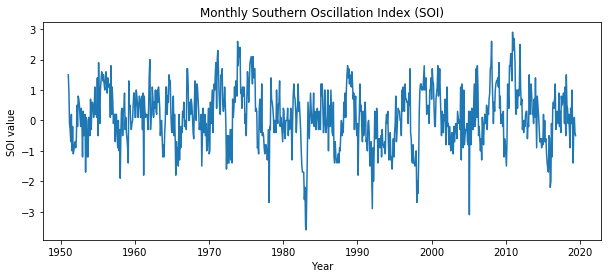

In [19]:
plt.figure(figsize=(10,4))
plt.plot(SOI.Date, SOI.SOI)
plt.xlabel('Year')
plt.ylabel('SOI value')
plt.title('Monthly Southern Oscillation Index (SOI)')
plt.savefig('SOI.png', transparent=True)

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


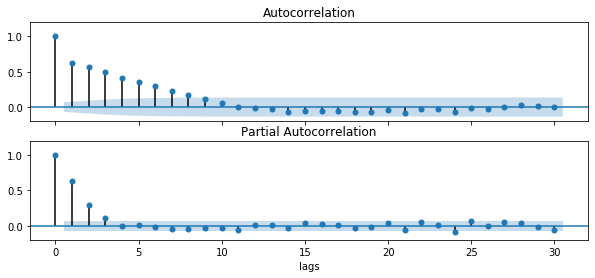

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(figsize=(10,4),nrows=2, ncols=1, sharex=True, sharey=True)

plot_acf(SOI.SOI, ax=ax[0])
plot_pacf(SOI.SOI, ax=ax[1])
plt.xlabel('lags')

ax[0].set_ylim((-0.2,1.2))
plt.savefig('SOIacfpacf.png', transparent=True)

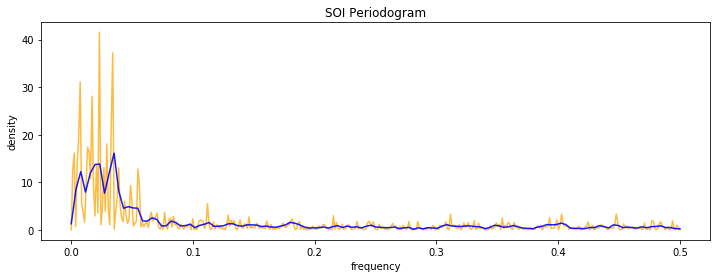

In [23]:
plt.figure(figsize=(12,4))



f, Pxx_den = signal.periodogram(SOI.SOI)
plt.plot(f, Pxx_den, color='orange', alpha=0.75)

f, Pxx_den = signal.welch(SOI.SOI)
plt.plot(f, Pxx_den, color='blue', alpha=0.9)
plt.xlabel('frequency')
plt.ylabel('density')
plt.title('SOI Periodogram')

# plt.vlines([2/139], ymin=0, ymax=5000)
# plt.vlines([7/139], ymin=0, ymax=5000)
# plt.vlines([f[np.argmax(Pxx_den)]], ymin=0, ymax=5000)


plt.savefig('SOIPer.png', transparent=True)

In [2]:
2015 - 1876

139

In [34]:
f[np.argmax(Pxx_den)]

0.03515625

In [36]:
SOI.Date[0]

Timestamp('1951-01-01 00:00:00')

In [35]:
SOI.Date.iloc[-1]

Timestamp('2019-06-01 00:00:00')